***
# Prey-predator model

***

Prey-Predator (also known in literature as Lotka-Volterra model) is a popular model to study dynamics of a system consisting of two antogonists, in this case rabbits (prey) and foxes (predator).

The dynamics of the sytem are determined by interactions within and between the prey and predator populations. The intra-species interactions are (natural) birth and (natural) death rates, while inter-species interactions are the predation of prey (i.e. predator 'eats' prey for its survival!). Let $X$ denote the population size of prey and $Y$ denote the popluation size of predator.

`For the population  dynamics of the prey: prey replicates at a rate that is controlled by abundance of the natural resources (rabbits need grass); we assume that these natural resources are abundant and remain at the same level throughout. Prey might die of natural causes (old age) or is eaten by predator. Thus the dynamics are reasonably modeled as:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$

For the population dynamics of predator: population of predator is expected increase linearly with its own size, and also on the population size of prey (since it needs prey as food). The natural death rate of the population depends on its own population size. Thus prey population size dynamics may be modeled as:
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$

Clearly the dynamics of the model are dependent on the four positive constants $\alpha,~\beta,~\gamma$, and $\delta$, which are to be inferred from the feild data.

We will study and understand the population dynamics of this model (i.e. $X(t)$ and $Y(t)$). We will set these four parameters to value of 1.

***

## Summary of tasks
1. [__For the model, set parameter values__](#parameters)
2. [__Plot of rate vector field__](#vectorfield)
3. [__Find steady states__](#steadystates)
3. [__Time evolution of system__](#timeevolution)
4. [__Find Jacobian__](#jacobian)
4. [__Brief interlude: Geometric Intepretation of matrix operation__](#geometric)
5. [__Find eigen values and eigen vectors for Jacobain Matrix__](#eigensystem)

***
<a id='parameters'>

#### Task-1: Set by hand the value of the 4 parameter values from the last four digits of your IIIT roll number

</a>

***

Add 1 to each digit and multiply by 2 and set this value to the parameters.

Alternatively: use $\displaystyle(\alpha,\beta,\gamma,\delta)=(2,1,1,2)$

***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.integrate

In [3]:
params=(8.,2.,4.,6.) # The last 4 digits of my roll no is 3012

***
<a id='vectorfield'>

#### Task-2: Plot the vector $\displaystyle\left(\frac{dX}{dt},\frac{dY}{dt}\right)$ in the XY plane

</a>

***

From this plot, qualitatively describe the behavior.

Hints (that *might* be useful for you to organize):
1. It will be useful for later to write the function `rate_vector(r,t,*cons)` where `r` is the list [X,Y], `t` is time (dummy for now) and `cons` is the __tuple__ of parameters; the output will be the list $\displaystyle\left[\frac{dX}{dt}, \frac{dY}{dt}\right]$.
2. The x-range and y-range are to be determined by the steady state position determined in the previous task.
3. For plotting the arrows, use the function `arrow(x,y,dx,dy)` to draw an arrow from point $(x,y)$ to point $(x+dx,y+dy)$.

***

In [4]:
# Task 2.1
def rate_vector(pos_vector, t, *cons):
    '''Given the pos_vecotr = (x,y), time t and the constants (alpha,beta,gamma,delta), find the rate vector (dX/dt, dY/dt) '''
    X, Y = pos_vector
    alpha, beta, gamma, delta = cons
    dXdt = alpha*X - beta*X*Y
    dYdt = gamma*X*Y - delta*Y
    return [dXdt, dYdt]

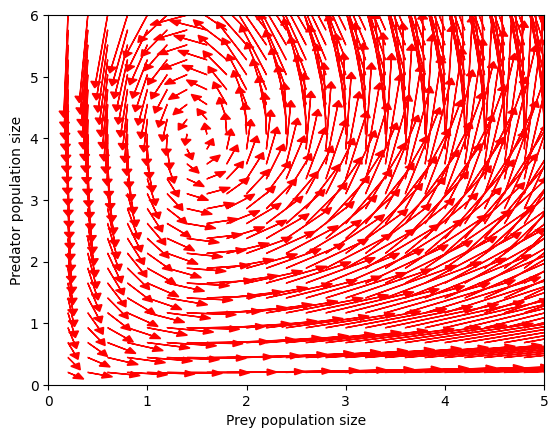

In [5]:
# Task 2.2 & Task 2.3
plt.xlim(0,5)
plt.ylim(0,6)

for x in np.linspace(0.2,5,25):
    for y in np.linspace(0.2,6,25):
        rate = rate_vector([x,y],1,*params)
        plt.arrow(x, y, rate[0]/20, rate[1]/20, head_width=0.1, head_length=0.1, fc='r', ec='r')

plt.xlabel('Prey population size')
plt.ylabel('Predator population size')
plt.show()

***

<a id='steadystates'>

#### Task-3: Find the steady states (where $\displaystyle\left(\frac{dX}{dt},\frac{dY}{dt}\right)=(0,0)$) by numerically solving the two coupled equations for the two unknowns $X,Y$

</a>

***

In [6]:
def equations(vars):
    x,y = vars
    return rate_vector([x,y],1,*params)

In [7]:
X0, Y0 = 1, 1
X, Y =  fsolve(equations, (X0, Y0))
print(f"The steady state values are X = {X} and Y = {Y}")

The steady state values are X = 0.0 and Y = 0.0


##### If I take (X0, Y0) as (1,1), I am getting steady state value as (0,0). Where as at (X0, Y0) = (2,2) or something higher, I am getting steady state value as (1.5, 4) which is consistent with the graph

In [8]:
X0, Y0 = 2, 2
X, Y =  fsolve(equations, (X0, Y0))
print(f"The steady state values are X = {X} and Y = {Y}")

The steady state values are X = 1.5 and Y = 4.0


***
<a id='timeevolution'>

#### Task-4: Integrate the Rate Laws and Analyze the Evolution of the System

</a>

***

In this task, we will study the time evolution of the predator-prey system. We will integrate the rate laws to find how the populations of predators (Y) and prey (X) change over time.

Follow these steps:

1. Choose initial values for $X(t=0)$ and $Y(t=0)$.
2. Use the `scipy.integrate.odeint` function to integrate the rate laws over a range of time points.
3. Plot $X(t)$ and $Y(t)$ against time to visualize the evolution of the system.
4. Analyze the behavior of the system based on your plot. Describe the dynamics of the predator and prey populations in your own words.

***

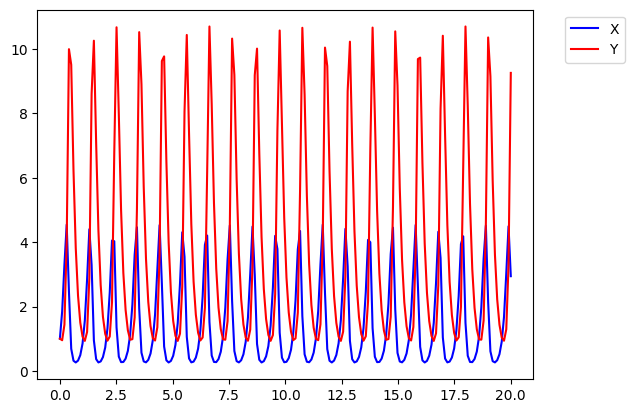

In [9]:
# Task 4.1,  Task 4.2 & Task 4.3
r0 = [1., 1.]
t = np.linspace(0, 20, 200)
sol = scipy.integrate.odeint(rate_vector, r0, t, args=params)
plt.plot(t, sol[:, 0], 'b', label='X')
plt.plot(t, sol[:, 1], 'r', label='Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

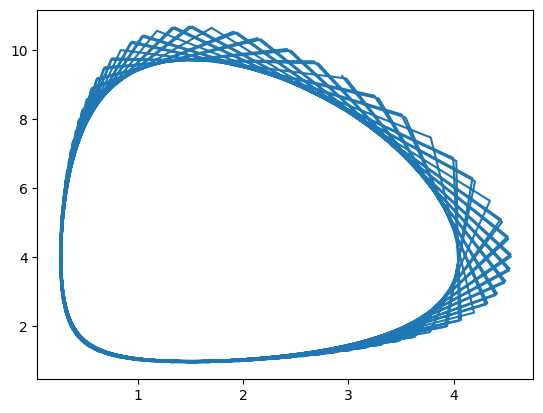

In [10]:
# Task 4.3 [Contd]
plt.plot(sol[:, 0], sol[:, 1], label='Trajectory from (1, 1)')

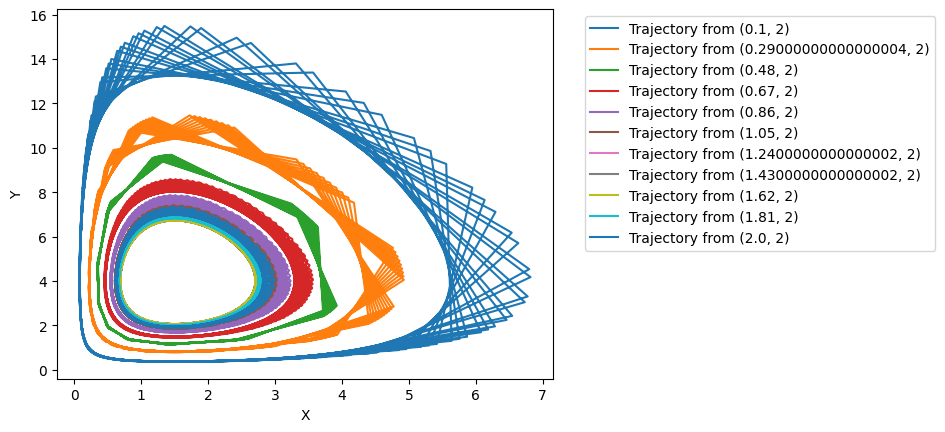

In [11]:
# Task 4.3 [Contd]
for x in np.linspace(0.1, 2, 11):
    r0 = [x, 2.]
    sol = scipy.integrate.odeint(rate_vector, r0, t, args=params)
    plt.plot(sol[:, 0], sol[:, 1], label=f'Trajectory from ({x}, 2)')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Task 4.4

In a predator-prey model, the populations of predators and prey often exhibit oscillatory behavior. This is due to the interdependent relationship between the two species:

- When the prey population (X) is large, the predator population (Y) has ample food, and thus grows.
- As the predator population grows, the prey population begins to decrease due to increased predation.
- When the prey population decreases significantly, the predators have less food available, leading to a decrease in the predator population.
- With fewer predators, the prey population starts to recover, and the cycle begins anew.

These dynamics often result in a cyclical pattern in the plot of $X(t)$ and $Y(t)$ over time, with the peaks and troughs of the predator population following those of the prey population.

The exact dynamics can vary based on the specific parameters (alpha, beta, gamma, delta) of the model. For example, if the birth rate of the prey is very high, the prey population might recover quickly even when the predator population is large. Conversely, if the death rate of the predators is very high, the predator population might decrease rapidly even when the prey population is large.


***
<a id='jacobian'>

### Task-5: Calculate the Jacobian Using SymPy

</a>

***

In this task, we will use SymPy, a Python library for symbolic mathematics, to calculate the Jacobian matrix of the predator-prey model. The Jacobian matrix provides important information about the local behavior of the system around a given point.

Here are the steps to follow:

1. Define the system of equations in SymPy.
2. Calculate the Jacobian matrix at any arbitrary point.
3. Evaluate the Jacobian matrix at the steady state(s) of the system.

Please note that when using SymPy, it's important to distinguish between 'variable' and 'value' types. Symbolic manipulations can only be performed on 'variables', not on 'values'. 'Values' are typically used for arithmetic operations.

While most of the code for this task is provided, we encourage you to try coding on your own first. This will help you understand the process better.

***

In [12]:
import sympy

In [13]:
# Define symbols
x = sympy.Symbol('x')
y = sympy.Symbol('y')

In [14]:
# Calculate rate vector
rate_vector_values = rate_vector([x, y], 1, *params)
print("Rate vector: ", rate_vector_values)

Rate vector:  [-2.0*x*y + 8.0*x, 4.0*x*y - 6.0*y]


In [15]:
# Convert to SymPy Matrix
rate_vector_matrix = sympy.Matrix(rate_vector_values)
print("Rate vector matrix: ", rate_vector_matrix)

Rate vector matrix:  Matrix([[-2.0*x*y + 8.0*x], [4.0*x*y - 6.0*y]])


In [16]:
# Calculate Jacobian
jacobian_matrix = rate_vector_matrix.jacobian(sympy.Matrix([x, y]))
print("Jacobian matrix: ", jacobian_matrix)

Jacobian matrix:  Matrix([[8.0 - 2.0*y, -2.0*x], [4.0*y, 4.0*x - 6.0]])


In [17]:
# Evaluate Jacobian at Steady State 1
jacobian_at_2_2 = (jacobian_matrix.subs(x, 2)).subs(y, 2)
print("Jacobian matrix at (2,2): ", jacobian_at_2_2)

Jacobian matrix at (2,2):  Matrix([[4.00000000000000, -4.00000000000000], [8.00000000000000, 2.00000000000000]])


In [18]:
# Evaluate Jacobian at Steady State 2
jacobian_at_0_0 = (jacobian_matrix.subs(x, 0)).subs(y, 0)
print("Jacobian matrix at (0,0): ", jacobian_at_0_0)

Jacobian matrix at (0,0):  Matrix([[8.00000000000000, 0], [0, -6.00000000000000]])


In [19]:
# Calculate eigenvalues and eigenvectors at (0,0)
eigenvalues_at_0_0, eigenvectors_at_0_0 = np.linalg.eig(np.array(jacobian_at_0_0).astype(np.float32))
print("Eigenvalues of Jacobian at (0,0): ", eigenvalues_at_0_0)
print("Eigenvectors of Jacobian at (0,0): \n", eigenvectors_at_0_0)

# Calculate eigenvalues and eigenvectors at (2,2)
eigenvalues_at_2_2, eigenvectors_at_2_2 = np.linalg.eig(np.array(jacobian_at_2_2).astype(np.float32))
print("Eigenvalues of Jacobian at (1.5,4): ", eigenvalues_at_2_2)
print("Eigenvectors of Jacobian at (1.5,4): \n", eigenvectors_at_2_2)

Eigenvalues of Jacobian at (0,0):  [ 8. -6.]
Eigenvectors of Jacobian at (0,0): 
 [[1. 0.]
 [0. 1.]]
Eigenvalues of Jacobian at (2,2):  [3.+5.5677643j 3.-5.5677643j]
Eigenvectors of Jacobian at (2,2): 
 [[0.10206208+0.5682576j 0.10206208-0.5682576j]
 [0.8164966 +0.j        0.8164966 -0.j       ]]


***
<a id='geometric'>

#### Task-6: Geometric Interpretation of Matrix (through its operation on vectors)

</a>

***

One of the common operations is a matrix operation on a vector, and many times of specific interest is multiple repeated operations of a matrix on a vector.

Consider **A**, an arbitrary 2x2 matrix. For an arbitrary unit vector **x**, plot **A** **x**. From this plot, can you generalize the operation **A** **x**?

Let matrix be $\textbf{A}$ of size $N\times N$ and column vector $\vec x$ of $N$ rows. Of interest is understanding $\textbf A \vec x$ and $\textbf A^n \vec x$. A common solution is to find the eigen values and eigen vectors of matrix $\textbf A$, i.e. solutions of eigen system $\textbf A \vec v = \lambda \vec v$ allows for $N$ solutions i.e.  pairs $(\lambda_i,\vec v_i)$ solve $\textbf A \vec v_i = \lambda_i \vec v_i$ for $1\le i \le N$, such that $\lambda_i \le \lambda_j$ when $i \le j$. When determinant of matrix is not zero (i.e. $\det \textbf A \ne 0$), the set of  vectors $\{\vec v_i,~i\in[1,N]\}$ form linearly independent set, and can act as basis vectors. [__Gram-Smidt Orthoganlization__](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) can convert these eigen vectors into ortho-normal vectors, i.e. $\vec v_i \cdot \vec v_j = \delta_{i,j}$, where Kroneker delta function $\delta_{i,j}=1$ when $i=j$ and 0 otherwise.

Any vector $\vec x$ can be written as linear combination of such basis vectors, i.e. $\vec x = \sum_{i=1}^N c^{(0)}_i \vec v_i$ with constants $c^{(0)}_i$. So that $\textbf A \vec x = \sum_{i=1}^N c^{(1)}_i \vec v_i$, with $c^{(1)}_i = \lambda_i c^{(0)}_i$. For a repeated operation of $\textbf A$, we have $\textbf A^k \vec x = \sum_{i=1}^N c^{(k)}_i \vec v_i$ with $c^{(k)}_i = \lambda^k_i c^{(0)}_i$.

For the matrix $\textbf A$, find the eigen values and eigen vectors. Draw projection of an arbitrary unit vector $\vec x$ onto the eigen vectors. Do the same for $\vec b$ where $\vec b = \textbf A \vec x$. Try for a few cases of $\vec x$ and see if the above statements regarding $A^k\vec x$ are true (for $k=1$).
***

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Here we are essentially finding the linear transformation of x with respect to the matrix A. This is the generalization.

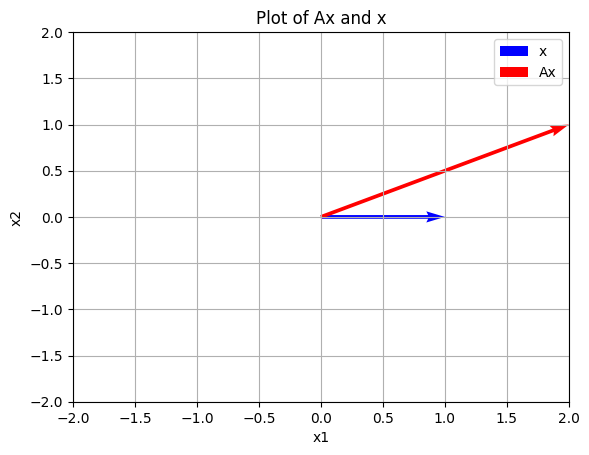

In [24]:
# Define the arbitrary 2x2 matrix A
A = np.array([[2, 1],
              [1, 2]])

# Define the unit vector x
x = np.array([1, 0])

# Perform the operation A * x
Ax = np.dot(A, x)

origin = [0], [0]
plt.figure()
plt.quiver(*origin, *x, color='b', angles='xy', scale_units='xy', scale=1, label='x')
plt.quiver(*origin, *Ax, color='r', angles='xy', scale_units='xy', scale=1, label='Ax')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of Ax and x')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

Eigen values are: [3. 1.]
Eigen vectors are: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


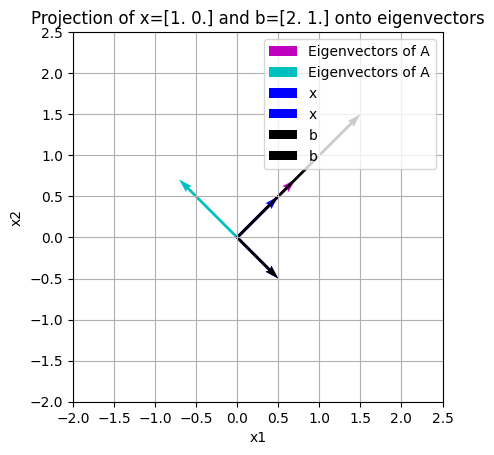

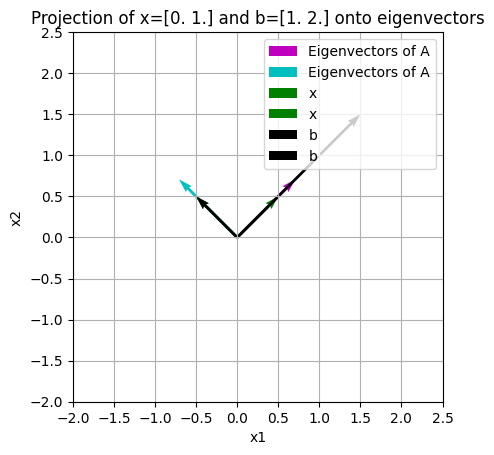

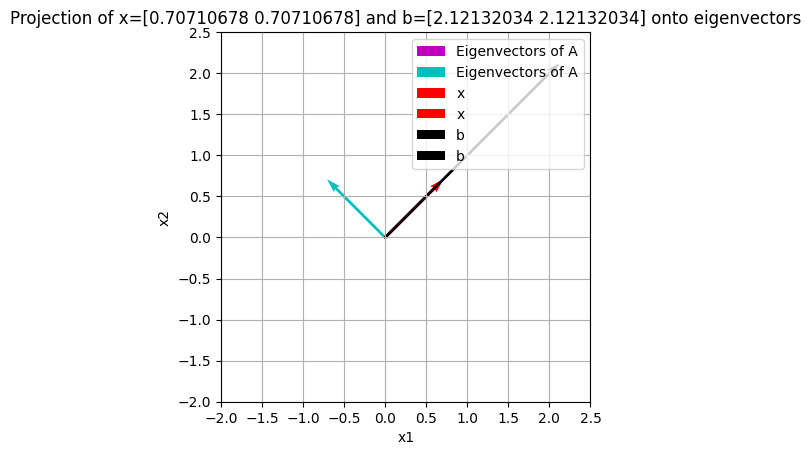

In [36]:
# Step 1: Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"Eigen values are: {eigenvalues}")
print(f"Eigen vectors are: {eigenvectors}")

# Loop over different unit vectors x
for x_values, color in zip([[1, 0], [0, 1], [1, 1]], ['b', 'g', 'r']):
    # Step 2: Normalize x
    x = np.array(x_values, dtype=float)
    x /= np.linalg.norm(x)

    # Step 3: Project x onto eigenvectors
    x_projections = [np.dot(x, v) * v for v in eigenvectors]

    # Step 4: Compute b = A * x
    b = np.dot(A, x)

    # Step 5: Project b onto eigenvectors
    b_projections = [np.dot(b, v) * v for v in eigenvectors]

    # Plotting
    origin = [0], [0]
    plt.figure()

    # Plot the eigenvectors of A
    for v, eig_color in zip(eigenvectors.T, ['m', 'c']):
        plt.quiver(*origin, *v, color=eig_color, angles='xy', scale_units='xy', scale=1, label='Eigenvectors of A')

    # Plot the projections of x onto eigenvectors
    for v_proj in x_projections:
        plt.quiver(*origin, *v_proj, color=color, angles='xy', scale_units='xy', scale=1, label='x')

    # Plot the projections of b onto eigenvectors
    for v_proj in b_projections:
        plt.quiver(*origin, *v_proj, color='k', angles='xy', scale_units='xy', scale=1, label='b')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Projection of x={x} and b={b} onto eigenvectors')

    # Set axis limits and increase the number of ticks
    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_xticks(np.arange(-2, 3, 0.5))
    plt.gca().set_yticks(np.arange(-2, 3, 0.5))

    plt.legend()
    plt.grid()
    plt.show()

***
<a id='eigensystem'>

#### Task 7: Find the value of the Jacobian at the steady state(or states), and find the eigenvalues and corresponding eigenvectors

</a>

***

With these eigen values and eigen values, determine the behaviour of the system in the neighbourhood of each steady state.

***

In [37]:
# Calculate eigenvalues and eigenvectors at (0,0)
eigenvalues_at_0_0, eigenvectors_at_0_0 = np.linalg.eig(np.array(jacobian_at_0_0).astype(np.float32))
print("Eigenvalues of Jacobian at (0,0): ", eigenvalues_at_0_0)
print("Eigenvectors of Jacobian at (0,0): \n", eigenvectors_at_0_0)

# Calculate eigenvalues and eigenvectors at (2,2)
eigenvalues_at_2_2, eigenvectors_at_2_2 = np.linalg.eig(np.array(jacobian_at_2_2).astype(np.float32))
print("Eigenvalues of Jacobian at (1.5,4): ", eigenvalues_at_2_2)
print("Eigenvectors of Jacobian at (1.5,4): \n", eigenvectors_at_2_2)

Eigenvalues of Jacobian at (0,0):  [ 8. -6.]
Eigenvectors of Jacobian at (0,0): 
 [[1. 0.]
 [0. 1.]]
Eigenvalues of Jacobian at (1.5,4):  [3.+5.5677643j 3.-5.5677643j]
Eigenvectors of Jacobian at (1.5,4): 
 [[0.10206208+0.5682576j 0.10206208-0.5682576j]
 [0.8164966 +0.j        0.8164966 -0.j       ]]




Steady State (0, 0):
Around the steady state (0, 0), the eigenvalues of the Jacobian matrix are real. This indicates a stable equilibrium. In this scenario, when the populations are low, the prey population may increase as there are fewer predators preying on them. Conversely, as the prey population increases, the predator population may decrease due to increased competition for resources. This cycle continues, resulting in fluctuations in both populations, but they tend to remain relatively low.

Steady State (1.5, 4):
Around the steady state (1.5, 4), the eigenvalues of the Jacobian matrix are complex. This indicates a stable focus or spiral equilibrium. In this scenario, the populations oscillate around the steady state point. The prey population may increase, leading to an increase in the predator population as more prey become available. However, as the predator population grows, it puts pressure on the prey population, causing it to decline. Consequently, the predator population decreases, allowing the prey population to recover, and the cycle repeats. This results in a periodic oscillation of both populations around the equilibrium point.